In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import pcolor


C:\Users\sitar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from ucimlrepo import fetch_ucirepo
automobile = fetch_ucirepo(id=10)
df = automobile.data.features
y = automobile.data.targets

In [3]:
%matplotlib inline

### Basic things first, let's view the data and it's features 

In [4]:
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


trying to analyze the datatype of each feature in the df

In [5]:
df.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [6]:
df.corr()#the corelaton between the variables in the dataframe 

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
price,1.000000,-0.704692,-0.686571,-0.101649,0.810533,0.071107,0.082310,0.543436,0.872335,0.708645,0.834415,0.135486,0.751265,0.690628,0.584642,0.046532,0.203254
highway-mpg,-0.704692,1.000000,0.971337,-0.054257,-0.770908,0.265201,-0.044528,-0.594572,-0.677470,-0.466666,-0.797465,-0.107358,-0.677218,-0.704662,-0.544082,-0.044507,-0.210768
city-mpg,-0.686571,0.971337,1.000000,-0.113788,-0.803620,0.324701,-0.042906,-0.594584,-0.653658,-0.445837,-0.757414,-0.048640,-0.642704,-0.670909,-0.470414,-0.020812,-0.258502
peak-rpm,-0.101649,-0.054257,-0.113788,1.000000,0.130971,-0.436221,-0.071493,-0.264269,-0.244618,-0.124434,-0.266306,-0.322272,-0.219957,-0.287325,-0.361052,-0.242485,0.264597
horsepower,0.810533,-0.770908,-0.803620,0.130971,1.000000,-0.205874,0.090254,0.577273,0.810773,0.691633,0.751034,-0.110711,0.642482,0.555003,0.352297,-0.124963,0.295772
compression-ratio,0.071107,0.265201,0.324701,-0.436221,-0.205874,1.000000,0.186170,0.005203,0.028971,-0.020002,0.151362,0.261214,0.181129,0.158414,0.249786,0.165799,-0.132654
stroke,0.082310,-0.044528,-0.042906,-0.071493,0.090254,0.186170,1.000000,-0.055909,0.206675,0.008578,0.168929,-0.056999,0.182956,0.129739,0.161477,-0.010697,0.065627
bore,0.543436,-0.594572,-0.594584,-0.264269,0.577273,0.005203,-0.055909,1.000000,0.594090,0.243553,0.649045,0.176195,0.559204,0.607480,0.490378,0.114501,-0.036167
engine-size,0.872335,-0.677470,-0.653658,-0.244618,0.810773,0.028971,0.206675,0.594090,1.000000,0.846031,0.850594,0.067149,0.735433,0.683360,0.569329,0.017519,0.167365
num-of-cylinders,0.708645,-0.466666,-0.445837,-0.124434,0.691633,-0.020002,0.008578,0.243553,0.846031,1.000000,0.609727,-0.013995,0.545007,0.430672,0.339507,-0.016530,0.175380


### to find the corelaton between specific features:

In [7]:
df[['bore','engine-size','stroke','horsepower']].corr()

,bore,engine-size,stroke,horsepower
bore,1.000000,0.594090,-0.055909,0.577273
engine-size,0.594090,1.000000,0.206675,0.810773
stroke,-0.055909,0.206675,1.000000,0.090254
horsepower,0.577273,0.810773,0.090254,1.000000


## REGRESSION PLOTS 

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


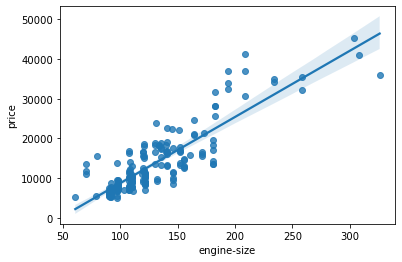

In [8]:
sns.regplot(x='engine-size',y='price',data=df)
df[['engine-size','price']].corr()

### from the above graph it's evident that the engine-size and price are well corelated and ,price ca be predicted from engine size 

## Box_Plots


<AxesSubplot:xlabel='body-style', ylabel='price'>

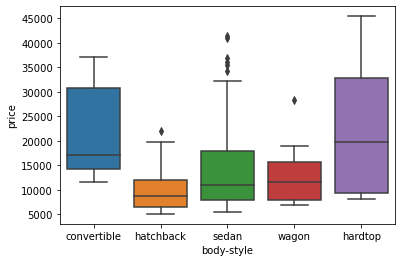

In [9]:
#let us take a categorical variable let's say body-style
sns.boxplot(x='body-style',y='price',data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<AxesSubplot:xlabel='engine-location', ylabel='price'>

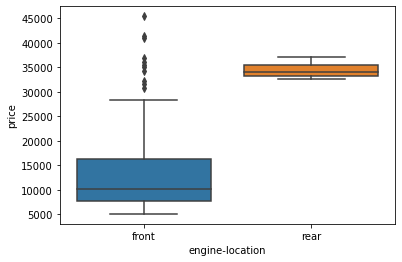

In [10]:
sns.boxplot(x='engine-location',y='price',data=df)

This could be a good sign! as the distributions are far apart, we ca say that engine-location can be a good predictor of price.

In [11]:
df.describe(include=['object'])

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
count,205,205,205,205,205,205,205,205
unique,8,7,2,3,5,2,2,22
top,mpfi,ohc,front,fwd,sedan,std,gas,toyota
freq,94,148,202,120,96,168,185,32


In [12]:
print(df['drive-wheels'].value_counts())
df['price'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 186, dtype: int64

In [13]:
drive_counts=df['drive-wheels'].value_counts().to_frame()
drive_counts.rename(columns={'drive-wheels':'value-counts'},inplace=True)
drive_counts.index.name='drive-wheels'
drive_counts

,value-counts
drive-wheels,
fwd,120
rwd,76
4wd,9


In [14]:
engine_loc=df['engine-location'].value_counts().to_frame()
engine_loc.rename(columns={'engine-location':'value-counts'},inplace=True)
engine_loc.index.name='engine-location'
engine_loc

,value-counts
engine-location,
front,202
rear,3


In [15]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
df_group_one=df[['drive-wheels','body-style','price']]
df_group_one=df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [17]:
df_gptest=df[['drive-wheels','body-style','price']]
df_grptest1=df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grptest1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [18]:
grouped_pivot=df_grptest1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot=grouped_pivot.fillna(0) #filling the missing values 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

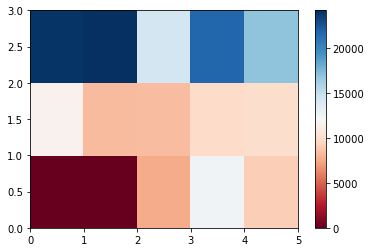

In [19]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

# corelation functions

In [20]:
from scipy import stats


In [21]:
df_cleaned = df.fillna(df.mean())  # Replace NaNs with column means
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)  # Replace Infs with NaNs
df_cleaned = df_cleaned.dropna()


C:\Users\sitar\AppData\Local\Temp\ipykernel_46388\2046951491.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cleaned = df.fillna(df.mean())  # Replace NaNs with column means


In [22]:
p_coef,p_val=stats.pearsonr(df_cleaned['wheel-base'],df_cleaned['price'])
print(p_coef,p_val)


0.5831681499789549 4.527625545686636e-20


In [23]:
p_coef,p_val=stats.pearsonr(df_cleaned['horsepower'],df_cleaned['price'])
print(p_coef,p_val)

0.7579169537498178 1.6076703978129875e-39


In [24]:
p_coef,p_val=stats.pearsonr(df_cleaned['length'],df_cleaned['price'])
print(p_coef,p_val)

0.6829862954386218 1.649887329121877e-29


In [25]:
p_coef,p_val=stats.pearsonr(df_cleaned['width'],df_cleaned['price'])
print(p_coef,p_val)

0.7286988175931842 3.214520483804299e-35


In [26]:
p_coef,p_val=stats.pearsonr(df_cleaned['engine-size'],df_cleaned['price'])
print(p_coef,p_val)

0.861752243685972 9.669661923635875e-62


In [27]:
p_coef,p_val=stats.pearsonr(df_cleaned['bore'],df_cleaned['price'])
print(p_coef,p_val)

0.5323000195387406 2.1398306512856245e-16


In [28]:
p_coef,p_val=stats.pearsonr(df_cleaned['city-mpg'],df_cleaned['price'])
print(p_coef,p_val)

-0.6674492651600002 8.463700497727927e-28


In [29]:
p_coef,p_val=stats.pearsonr(df_cleaned['highway-mpg'],df_cleaned['price'])
print(p_coef,p_val)

-0.6905257341183487 2.2324674058375567e-30


##### now  that all the variables are gathered i have an idea on the vars which are dependent and this info can be used to predict the price of a new car.

# REGRESSION MODELS 

LET US START OFF WITH THE LINEAR REGRESSION 


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()
x=df_cleaned[['city-mpg']]
y=df_cleaned['price']
lr.fit(x,y)
y_hat=lr.predict(x)
print(lr.intercept_)#view the intercept 'c'
print(lr.coef_)#view the slope 'm'
print(y_hat)


33453.24673832327
[-802.79575705]
[16594.53584029 16594.53584029 18200.12735439 14186.14856915
 19002.92311144 18200.12735439 18200.12735439 18200.12735439
 19805.71886849 20608.51462554 14988.9443262  14988.9443262
 16594.53584029 16594.53584029 17397.33159734 20608.51462554
 20608.51462554 21411.31038259 -4278.15384298  2947.00797046
  2947.00797046  3749.80372751  8566.5782698  14186.14856915
  8566.5782698   8566.5782698   8566.5782698  14186.14856915
 14186.14856915 18200.12735439 -5883.74535708  8566.5782698
  2947.00797046  9369.37402685  9369.37402685  9369.37402685
  9369.37402685 11777.761298   11777.761298   11777.761298
 11777.761298   14186.14856915 13383.3528121  14186.14856915
  2947.00797046  2947.00797046 14186.14856915 21411.31038259
 21411.31038259 23016.90189669  9369.37402685  8566.5782698
  8566.5782698   8566.5782698   8566.5782698  19805.71886849
 19805.71886849 19805.71886849 20608.51462554 12580.55705505
 12580.55705505 12580.55705505 12580.55705505  4552.5994

so the line equation will be y=-802.79*x+33453.246

    NOW WE CAN ALSO FIT A MULTIPLE REGREESION BY THE SAME WAY BUT TAKING MULTIPLE VARIABLES INTO ACCOUNT 
    

In [32]:
z=df_cleaned[['city-mpg','highway-mpg','horsepower','engine-size']]
lr.fit(z,df_cleaned['price'])
Yhat=lr.predict(z)
print(lr.intercept_)
print(lr.coef_)#we get an array of intercepts.
print(Yhat)

1225.5435019287706
[  98.70890072 -279.41446943   15.97667576  129.37681422]
[14346.63659989 14346.63659989 17961.92023824 10943.8167133
 16287.74983326 15468.3319469  15468.3319469  15468.3319469
 16500.40269418 16162.39836971 10979.16879204 10979.16879204
 18625.80057154 18625.80057154 19365.33507912 26605.27674558
 26605.27674558 27065.39678373  -285.23894059  5723.94012633
  5723.94012633  6152.10681296  6398.09681697  9520.67175686
  6398.09681697  6398.09681697  6398.09681697  9520.67175686
 12402.0418376  18894.46635219  3803.21238982  6784.66385145
  4420.44288177  7803.61282847  7803.61282847  7803.61282847
  7803.61282847 10275.45000929 10275.45000929 10275.45000929
 10275.45000929 11616.04579063 10860.53460729 11098.54459305
  5723.94012633  5723.94012633 12325.27921588 33588.41509548
 33588.41509548 44121.44371491  8384.6660165   6527.47363119
  6527.47363119  6527.47363119  6527.47363119  7147.08326393
  7147.08326393  7147.08326393  8885.3494811  11976.72399715
 11976.723

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

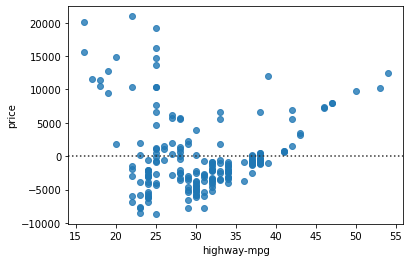

In [33]:
# to create a residual plot 
sns.residplot(x=df['highway-mpg'],y=df['price'])

C:\Users\sitar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sitar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

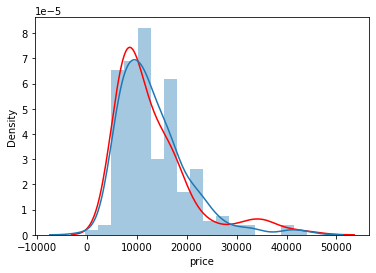

In [34]:
ax1=sns.distplot(df_cleaned['price'],hist=False,color='r',label="Actual value")
sns.distplot(Yhat,label='Fitted value',ax=ax1)

In [35]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [37]:
#from numpy import polyld
x=df['city-mpg']
y=df['price']
y_=np.polyfit(x,y,3)
p=np.poly1d(y_)
print(p)

     3       2
nan x + nan x + nan x + nan


In [43]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
pr=PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(df_cleaned[['horsepower','city-mpg']])

# PIPELINING

In [49]:
from sklearn.pipeline import Pipeline
Input=[('scale',StandardScaler),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df_cleaned[['horsepower','highway-mpg','engine-size','city-mpg']],df_cleaned['price'])


AttributeError: 'DataFrame' object has no attribute 'fit'